# Exercise 3 - Choose one of the systems below and study its synchronization properties.

In all cases, think of natural situations that might be represented by those systems. If you find examples that are close but do not fit, discuss why.

#### 1. Self drive versus external forcing. Implement two ensembles of 100 Kuramoto oscillators , one coupled through their common average phase Y and another through an external driving phase W . Choose between a Gaussian distribution g(w) of natural frequencies centered at pi, a uniform distribution between 0 and 2\*pi or a bimodal distribution with peaks at pi/2 and 3\*pi/2 and (equal) dispersions of your choice.

* Study the synchronization transition through the order parameter r as K varies in the two ensembles. Use W = pi as external forcing. Are there quantitative differences between the two transitions? Why? How may the transition change if a different g(w) is used?

* Plot the distribution of phase differences between all pairs of oscillators for different values of K , before and after the transition. Discuss their shape.

* Vary W and K to estimate the regions where the frequencies of all oscillators are synchronized (Arnold
tongues).

First, we will model a system of 100 Kuramoto oscillators coupled through their average phase (phi), and another set of 100 oscillators couples through a external force (W). We will consider the natural frequencies of the oscillators as a uniformly distributed between 0 and 2pi.

We will elaborate a function that integrates the derivative of theta for a set of N oscillators. This function will accept the synchronization method as an argument: average [𝜃𝑖_dot=𝜔𝑖+𝐾𝑟sin(Ψ−𝜃𝑖)] or external [𝜃𝑖_dot=𝜔𝑖+𝐾sin(Ω𝑡−𝜃𝑖)].

In [20]:
import numpy as np

def theta_new(theta, K, dt, syn_method, ext_force = 0, w = "uniform"):     # Fuction that calculates new theta value
    
    if w == "uniform":
        w = np.random.uniform(0, 2*np.pi, len(theta))                           # Uniform distribution of natural frequencies
    if w == "gaussian":
        w= np.random.normal(loc=np.pi, size=len(theta))                         # Gaussian distribution centered at pi
    
    r = (1/len(theta))*np.sqrt(sum(np.sin(theta))**2+sum(np.cos(theta))**2)     # Phase-coherence
    
    if syn_method == "average":
        psi = np.arctan2(sum(np.sin(theta)), sum(np.cos(theta)))%(2*np.pi)        # Average phase
        dtheta = w + K*r*np.sin(psi - theta)        # derivative of theta

    elif syn_method == "external":
        dtheta = w + K*np.sin(ext_force - theta)    # derivative of theta    

    else:
        print("Please select a synchronization method: average or external")
    
    new_theta = (theta + dt*dtheta)%(2*np.pi)

    phase_diff = np.zeros((len(theta), len(theta)))     # Create matrix to save the phase difference for every pair of oscillators
    for n in range(len(theta)):
        phase_diff[n,:] = theta - np.roll(theta, n)     # np.roll(array, n) rolls n positions every position of the array
                                                        # matrix M[i,j] contains i paired differences for j oscillators
    return new_theta, r, phase_diff

def integrate(theta, K, dt, nsteps, syn_method, ext_force = 0, w = "uniform"):     # Iteratively calculate consecutive theta values n times
    r_array = []                                                    # Defined external force as 0 as default.
    
    theta_matrix = np.zeros((nsteps,len(theta)))   
    theta_matrix[0,:] = theta
    new_theta = np.copy(theta)

    phase_diff_array = []

    for i in range(nsteps): 
        new_theta, r, phase_diff= theta_new(new_theta, K,dt, syn_method, ext_force, w)
        theta_matrix[i,:] = new_theta           # Phases i for j oscillators are stored in a matrix M[i,j]
        r_array.append(r)                       # r values are appended into an array
        phase_diff_array.append(phase_diff)     # phase difference matrixes are stored in an array
        
    return theta_matrix, r_array, phase_diff_array


We now generate a function that plots the phases and of phase coherences of our oscillator sets comparing both coupling methods: average phase coupling and external force coupling.

C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\1166149185.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":


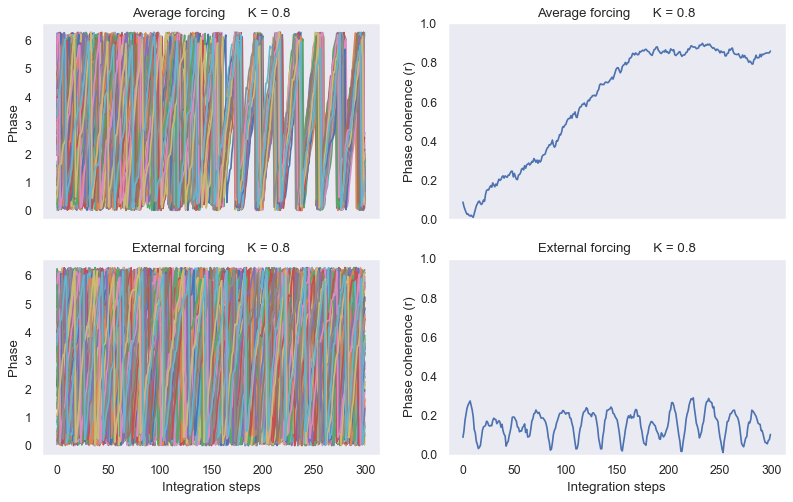

In [16]:
import matplotlib.pyplot as plt

def plot_oscillators(K):

    # Defining initial values and parameters

    n_osc = 100
    theta = np.random.random(n_osc)*2*np.pi     # Vector containing theta values
    K = K                                       # Coupling strength
    ext_force = np.pi                           # External force = pi

    n_steps = 300    # Number of integration steps
    dt = 0.1         # Time difference for each step

    # Integrate theta derivative

    theta_matrix_avg, r_array_avg, phase_diff = integrate(theta, K, dt, n_steps, syn_method="average")
    theta_matrix_ext, r_array_ext, phase_diff = integrate(theta, K, dt, n_steps, syn_method="external", ext_force = ext_force)


    # Plot oscillator phases and phase coherence over time
    # AVERAGE FORCING

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, dpi = 80, figsize = (12,7), sharex= True)
    ax1.plot(range(len(theta_matrix_avg)), theta_matrix_avg[:,:])
    ax2.plot(range(len(r_array_avg)), r_array_avg)

    ax1.set_title("Average forcing      K = {}".format(K))
    ax1.set_ylabel("Phase")
    ax2.set_title("Average forcing      K = {}".format(K))
    ax2.set_ylabel("Phase coherence (r)")
    ax2.set_ylim((0,1))

    # EXTERNAL FORCING

    ax3.plot(range(len(theta_matrix_ext)), theta_matrix_ext[:,:])
    ax4.plot(range(len(r_array_ext)), r_array_ext)

    ax3.set_title("External forcing      K = {}".format(K))
    ax3.set_xlabel("Integration steps")
    ax3.set_ylabel("Phase")
    ax4.set_title("External forcing      K = {}".format(K))
    ax4.set_xlabel("Integration steps")
    ax4.set_ylabel("Phase coherence (r)")

    ax4.set_ylim((0,1))

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

plot_oscillators(K=0.8)

In the first plot we can see an example of coupling trough both internal phase average and external phase for K = 0.8.

Now we will study the synchronization transition through the order parameter r as K varies in the two ensembles.

C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\1166149185.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":


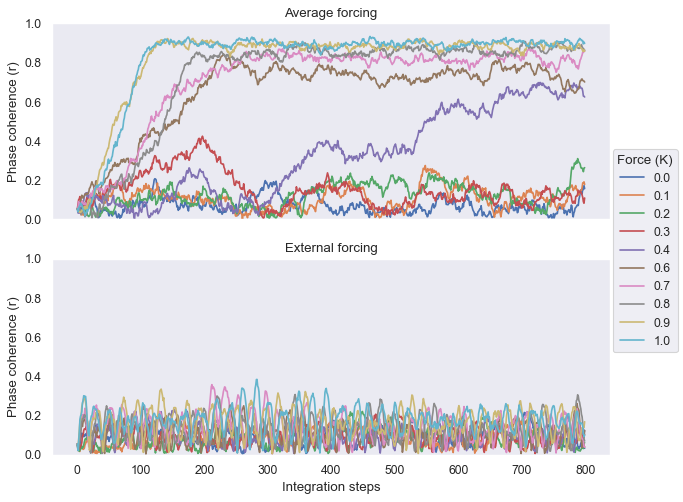

In [18]:
n_osc = 100
theta = np.random.random(n_osc)*2*np.pi     # Vector containing theta values
ext_force = np.pi                           # External force = pi

dt = 0.1                                    # Time difference for each step
n_steps = 800                               # We increase the number of integration steps to see long-term evolution

def plot_transition(w = "uniform"):
    fig, (ax2, ax4) = plt.subplots(2, 1, dpi = 80, figsize = (9,7), sharex= True)

    for K in np.linspace(0, 1, 10):          

        theta_matrix_avg, r_array_avg, phase_diff= integrate(theta, K, dt, n_steps, syn_method="average", w = w)
        theta_matrix_ext, r_array_ext, phase_diff = integrate(theta, K, dt, n_steps, syn_method="external", ext_force = ext_force, w = w)

        # Plot oscillator phases and phase coherence over time
        # AVERAGE FORCING

        ax2.plot(range(len(r_array_avg)), r_array_avg)

        # EXTERNAL FORCING

        ax4.plot(range(len(r_array_ext)), r_array_ext, label = K.round(1))


    ax2.set_title("Average forcing")
    ax2.set_ylabel("Phase coherence (r)")
    ax2.set_ylim((0,1))

    ax4.set_title("External forcing")
    ax4.set_xlabel("Integration steps")
    ax4.set_ylabel("Phase coherence (r)")
    ax4.set_ylim((0,1))

    fig.legend(title = "Force (K)", loc = "center right")

    ax2.grid()
    ax4.grid()

plot_transition()

We can observe that the system of oscillators coupled through their common average phase achieve synchronization when the coupling strength is high enough. Synchronization is achieved when the phase coherence (r) reaches a stability slope, that it, r remains stable (without considering small stochastic noise). In the plot above, we can see that synchronization is achieved for K > 0.5; for lower K values, phase coherence does not stabilize, but fluctuates. Importantly, the loker the K value is, the faster the oscillators synchronize, it takes less iterations to reach r stability.


As for oscillators coupled through an external phase phi = pi, they never reach synchronization for 0 < K < 1. Interestingly, the phase coherence (r) curve shows an oscillatory behaviour. For K values larger that 1, r acquire higher overall values but the curve shows the same erratic oscillatory behaviour. Below, the behaviour of both ensembles is shown for K = 3.



C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":


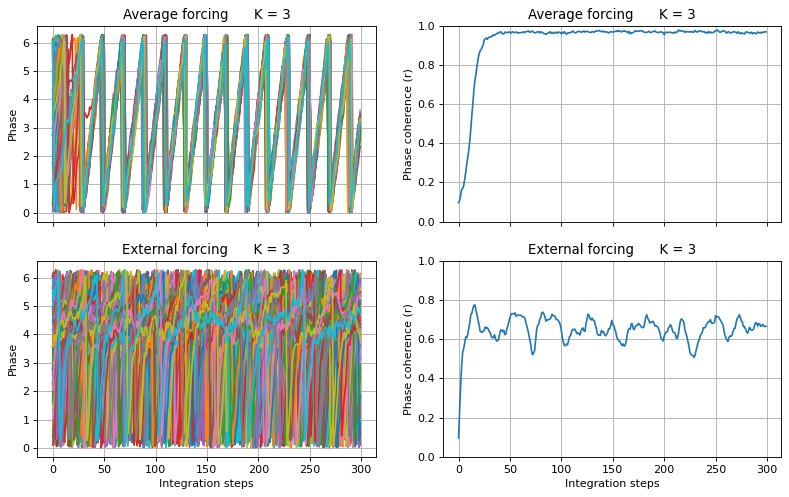

In [5]:
plot_oscillators(K=3)

Now we will analyze the synchronization transition when using a different distribution of natural frequencies, specifically, a gaussian distribution centered at pi.

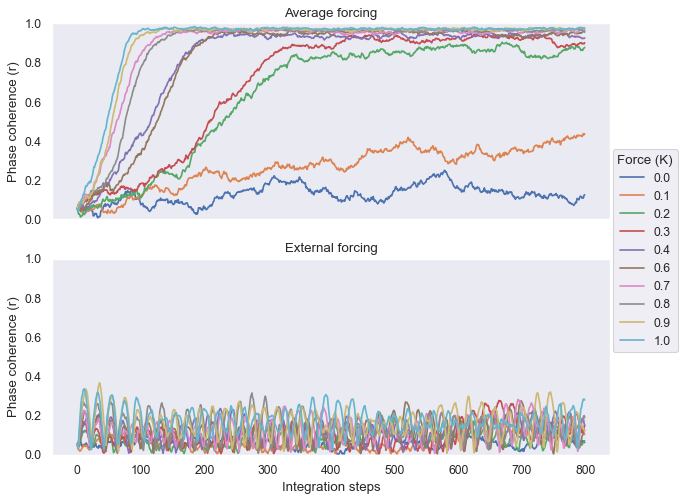

In [21]:
plot_transition(w = "gaussian")

We observe that when coupling through average phase, we require lower coupling strength to achieve synchronization and we achieve it much faster. However, we do not observe significant differences in the external forced ensemble.

Now, I will study the distribution of phase differences between all pairs of oscillators for different values of K, before and after the transition. I stored the pairwise phase differences between each oscillator and the others of the ensemble into a matrix. M[ *i, j* ] contains the phase difference between oscillator *j* and the oscillator at *i* adjancent position.

In [6]:
import seaborn as sns
import pandas as pd

def plot_phase_diff(K, method, ext_force=np.pi):
    n_osc = 100
    np.random.seed(50)                          # Define pseudorandom seed to ensure reproducibility
    theta = np.random.random(n_osc)*2*np.pi     # Vector containing theta values

    n_steps = 400    # Number of integration steps
    dt = 0.1         # Time difference for each step

    theta_matrix_avg, r_array_avg, phase_diff = integrate(theta, K, dt, n_steps, syn_method=method, ext_force=ext_force)

    # Convert phase difference data into a DataFrame to plot it using seaborn

    df = pd.DataFrame([phase_diff[i][:,5] for i in np.arange(n_steps, step=100)]).T
    df.columns = ['0 iterations', '100 iterations', "200 iterations", "300 iterations"]
    
    plt.figure(dpi = 80, figsize=(8,6))
    sns.set(style="darkgrid")
    sns.kdeplot(data = df, fill=True, bw_method=0.3, legend = True)
    plt.title("Phase differences distribution   K = {}".format(K.round(1)))
    plt.xlabel("Paired phase differemce")
    

C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":
C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":
C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":
C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":
C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, b

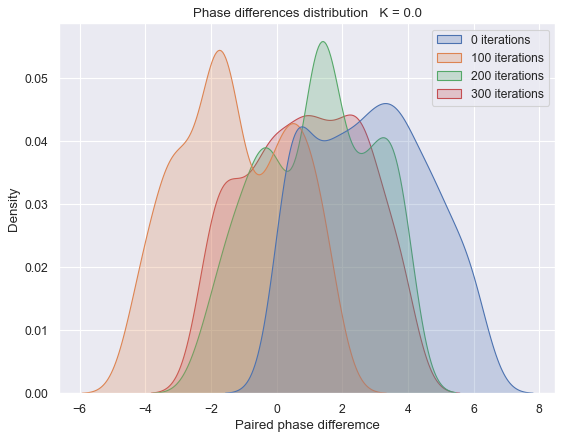

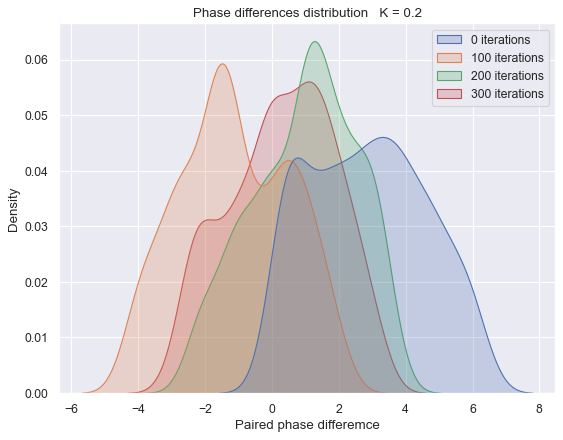

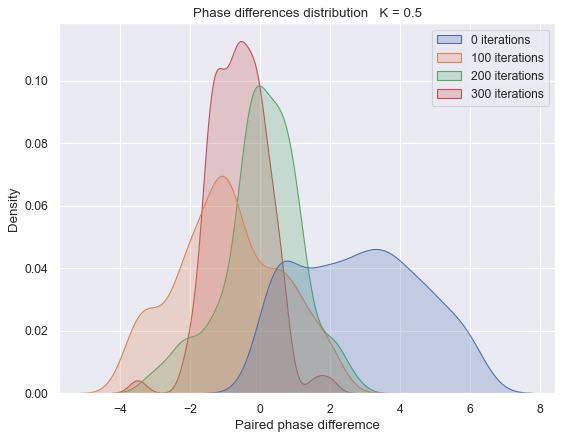

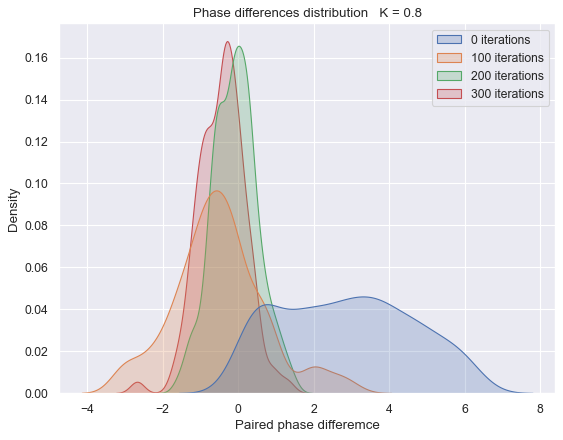

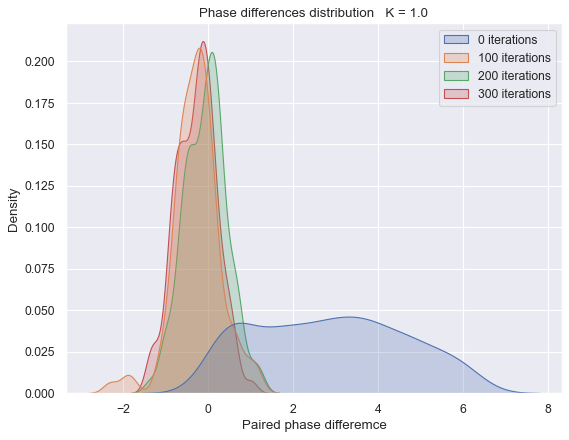

In [7]:
for k in np.linspace(0,1,5):
    plot_phase_diff(k, method = "average")

In this plots we can observe how the distribution of phase differences within the oscillator ensemble varies before and after the transition induced by the coupling through average internal phase. When the coupling strength K is lower that 0.5, the distribution of phase difference is rather disperse and remains the same after time, there is no synchronization of phases. In contrast, when K is greater than 0.5, phase differences are initially disperse but after several integration their distribution gets narrowed and centered around 0, reflecting that synchronization occurs. The larger K value is, the less steps it takes to achieve this synchronization.

Finally, I will try to estimate the regions where the frequencies of all oscillators are synchronized, the so called Arnold tongues. To do this, I will vary the external phase (W) and the coupling strength (K) and measure their effect on the phase coherence (r).

C:\Users\adrib\AppData\Local\Temp\ipykernel_66896\3886583912.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if w == "gaussian":


Text(47.25, 0.5, 'Coupling strength $k$')

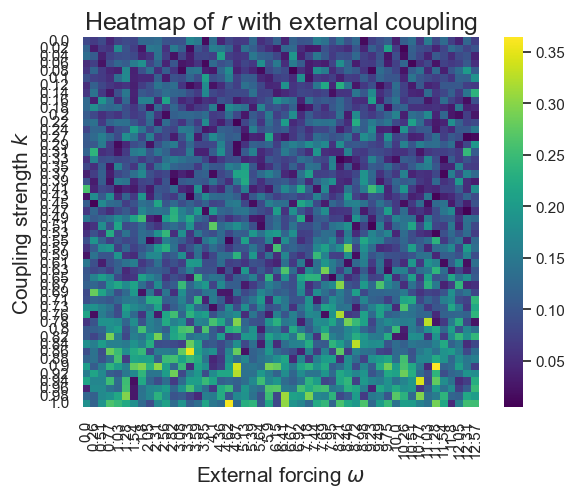

In [11]:
n_osc = 100
theta = np.random.random(n_osc)*2*np.pi
dt = 0.1
n_steps = 100

ext_forces = np.linspace(0, 4*np.pi, 50)
coupling_forces = np.linspace(0, 1, 50)

r_matrix = np.zeros((len(coupling_forces), len(ext_forces)))

for i in range(len(ext_forces)):
    for j in range(len(coupling_forces)):
        theta_matrix_avg, r_array_avg, phase_diff = integrate(theta, coupling_forces[j], dt, n_steps, syn_method = "external", ext_force = ext_forces[i])
        r_matrix[j,i] = round(r_array_avg[-1], 3)           #Append r after n oscillations (n-1 actually)

sns.heatmap(r_matrix, cmap = "viridis", xticklabels = np.around(ext_forces, 2), yticklabels = np.around(coupling_forces, 2))

plt.title(f'Heatmap of $r$ with external coupling', fontsize=18)
plt.xlabel('External forcing $\omega$', fontsize=15)
plt.ylabel('Coupling strength $k$', fontsize=15)

I could not observe the pressence of Arnold tongues in my model. However, we can observe an overall increase in phase coherence as the coupling strength gets closer to 1, supporting our previous observations.